## Bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

## Carregando Treino

In [ ]:
df = pd.read_csv('santander-customer-transaction-prediction/train.csv')

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [3]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [4]:
df.isna().sum().sum()

np.int64(0)

In [5]:
train, test = train_test_split(df, train_size=.8, stratify=df['target'], random_state=42)

In [ ]:
X_train, y_train = train.iloc[:, 2:], train['target']
X_train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
172692,15.4140,-2.1016,10.4773,4.8941,12.6506,-3.7205,5.1426,17.7048,4.2444,8.6555,10.0209,-13.4563,14.0022,13.0615,11.3380,14.6171,4.2687,-5.6576,21.0008,6.9801,8.9196,28.8931,-0.3950,2.4799,9.3506,13.6931,1.2336,-0.9651,5.6141,5.0811,-18.5176,9.5308,1.0793,23.3622,11.2098,-5.4244,1.9605,1.4301,17.7617,-4.9850,-10.7773,11.0040,12.7718,11.9050,13.4037,3.2029,13.5579,-17.2106,22.8710,15.1999,12.7311,6.8031,-4.4416,6.7444,20.6511,13.7323,11.7071,5.4587,3.0283,8.8766,10.3692,-22.2380,-1.0573,-0.5342,4.7542,-3.2741,7.0194,13.4588,5.0211,2.1499,32.1425,0.3156,-2.6084,19.9219,11.0218,18.1787,10.2909,18.6849,1.9631,15.1901,18.0833,11.4192,8.9522,-7.1626,1.3160,13.5144,15.0519,15.8918,6.9963,6.8394,-31.5188,7.2602,8.0964,10.4267,11.0412,-0.4476,20.9109,20.1591,2.6438,-3.0228,3.0278,20.1126,13.9189,1.6448,11.6309,4.3673,5.1344,13.1775,14.3571,18.7496,5.8836,6.8186,0.4201,8.9661,2.0574,2.6428,3.5524,18.0910,9.2358,7.0403,0.9494,8.1747,1.5540,4.3446,5.8481,11.8144,13.5262,2.0206,-2.8247,13.4281,12.4123,0.5484,8.1759,7.6618,-0.5586,3.4099,34.8877,18.1438,-8.4214,14.3740,-2.2642,10.7733,9.8372,11.0933,8.2467,6.6335,9.6965,-15.0018,4.1204,5.1653,16.9289,3.8153,8.9801,17.5041,11.2814,-8.6312,12.3006,-6.1935,31.5893,9.2086,39.1655,5.6497,6.0794,6.8441,1.6970,13.9070,3.4186,-17.0075,6.9393,5.5012,-10.0089,-4.1131,19.3432,2.6488,17.6551,13.4570,-14.8274,9.3351,11.6851,0.2308,-5.7969,10.6242,4.4049,10.5102,13.5850,1.6301,3.3935,6.7777,20.3512,0.8541,-2.8810,8.1647,1.0927,2.1215,17.6536,3.2253,-2.1234,8.9516,13.3485,-16.0178
123366,12.3576,-8.1666,11.7785,2.8869,12.3183,-6.9847,4.2671,9.6710,3.0662,4.8252,4.8508,10.5200,14.0069,3.4091,9.6423,13.9715,8.6455,-4.3503,11.3110,7.3729,6.3876,11.2888,-0.8828,3.4036,8.1691,13.6494,-4.4422,0.8522,6.1120,3.2191,-25.5764,13.5301,1.9318,18.3917,11.0016,8.0777,5.6636,8.9416,4.3702,3.0748,-14.9481,3.3851,12.2685,11.8712,6.9860,-10.0409,8.8838,-7.8716,2.8512,14.9198,13.8592,22.3265,-1.3498,6.5631,9.8568,19.1643,15.4673,6.4599,2.6105,9.9003,14.6944,-25.4268,2.1006,0.8281,5.3059,4.6407,6.5739,15.8980,5.0303,1.3576,44.4471,0.6477,-1.3539,12.8691,-0.1413,10.1026,15.8732,18.7326,3.5042,12.5091,5.5564,14.4940,2.7596,10.2440,-1.7475,11.5032,12.8242,9.2829,11.4453,3.7402,-31.8229,6.8123,15.2806,10.0952,13.1765,-0.0805,23.3692,12.4996,2.5301,3.0000,0.1940,22.0543,19.7075,1.4563,14.1715,3.9780,5.5573,28.2239,14.0723,13.2323,2.3799,5.3336,1.4300,6.5460,1.3573,1.3750,2.6038,17.7632,-12.1051,2.6901,23.8554,10.1097,-6.0629,9.4540,5.2670,12.3594,12.8815,-0.7153,2.

## Otimização de Modelo e Hiperparâmetro e Treinamento do Modelo

In [7]:
pipelines = [
    {
        'name': 'Stochastic Gradient Descent Classifier',
        'classifier_class': SGDClassifier,
        'param_grid': {
            'classifier__penalty': ['l2', 'elasticnet'],
            'classifier__alpha': [0.0001, 0.001]
        }
    },
    {
        'name': 'Random Forest Classifier',
        'classifier_class': RandomForestClassifier,
        'param_grid': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [10, 15],
            'classifier__n_jobs': [5]
        }
    },
    {
        'name': 'XGBoost Classifier',
        'classifier_class': XGBClassifier,
        'param_grid': {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [5, 10, 15],
            'classifier__n_jobs': [5]
        }
    }
]

In [8]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

best_model = None
best_score = -1
best_params = {}
best_model_name = ""

In [9]:
for model_config in pipelines:
    model_name = model_config['name']
    classifier_class = model_config['classifier_class']
    param_grid = model_config['param_grid']

    classifier = classifier_class(random_state=42)        
 
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=skf,
        scoring='f1',
        n_jobs=1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        best_model_name = model_name


print(f"Best Model: {best_model_name}")
print(f"Best F1: {best_score:.4f}")
print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_model}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Model: XGBoost Classifier
Best F1: 0.3621
Best Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__n_jobs': 5}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               i

In [10]:
model = best_model
model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


## Avaliação em Teste

In [11]:
X_test, y_test = test.iloc[:, 2:], test['target']
pred_test = best_model.predict(X_test)
prob_pred_test = best_model.predict_proba(X_test)[:, 1]

In [12]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

Test Metrics
Accuracy: 0.913325
F1: 0.35831945215620953
Precision: 0.6999276934201012
Recall: 0.2407960199004975
ROC Curve


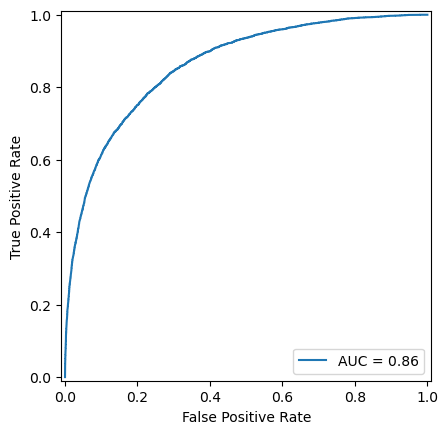

Confusion Matrix


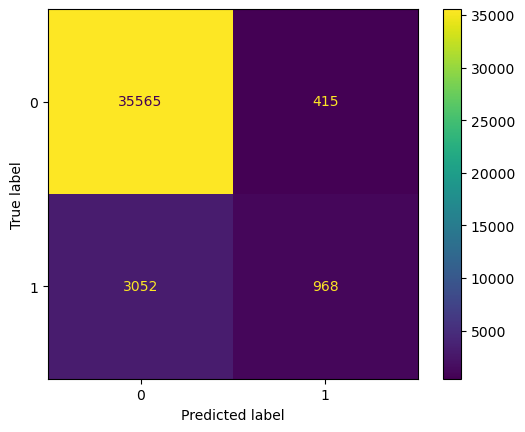

In [13]:
print("Test Metrics")
print(f"Accuracy: {accuracy_score(y_test, pred_test)}")
print(f"F1: {f1_score(y_test, pred_test)}")
print(f"Precision: {precision_score(y_test, pred_test)}")
print(f"Recall: {recall_score(y_test, pred_test)}")
print("ROC Curve")
fpr, tpr, thresholds = roc_curve(y_test, prob_pred_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test, pred_test)
display = ConfusionMatrixDisplay(c_matrix)
display.plot()
plt.show()

## Salvando Modelo

In [14]:
import joblib
joblib.dump(model, 'deploy/model.joblib')

['deploy/model.joblib']